In [4]:
!python3 -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.4 MB/s eta 0:00:004.4 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [5]:
pip install -Uq pymcel

Note: you may need to restart the kernel to use updated packages.


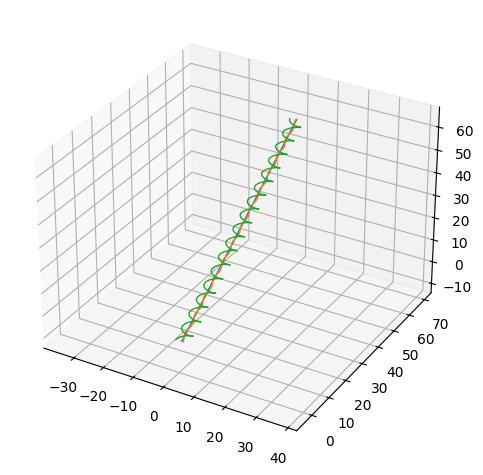

In [28]:
sistema=[
    dict(
        m=10,
        r=[1,0,0],
        v=[0,1,0.5]),
    dict(
        m=1,
        r=[1.5,0,0],
        v=[0,-3,1],
    ),
    dict(
        m=0.1,
        r=[-1,0,0],
        v=[0,3,0],
    )
]

from numpy import linspace

#Solución
from pymcel.export import ncuerpos_solucion 
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,
                                           linspace(0.0,100.0,200))

#Gráfica en el sistema de referencia inercial original
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rs,vs)

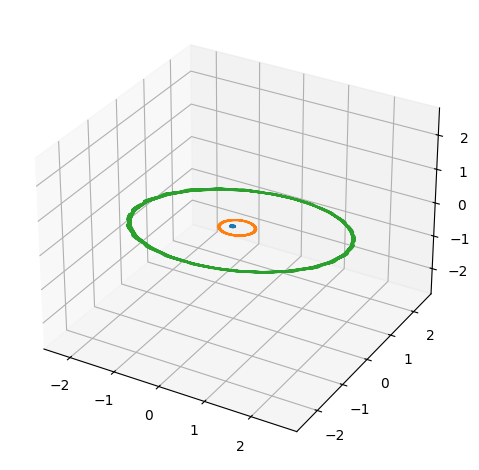

In [29]:
#Gráfica en el sistema de referencia del centro de masa
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rps,vps);

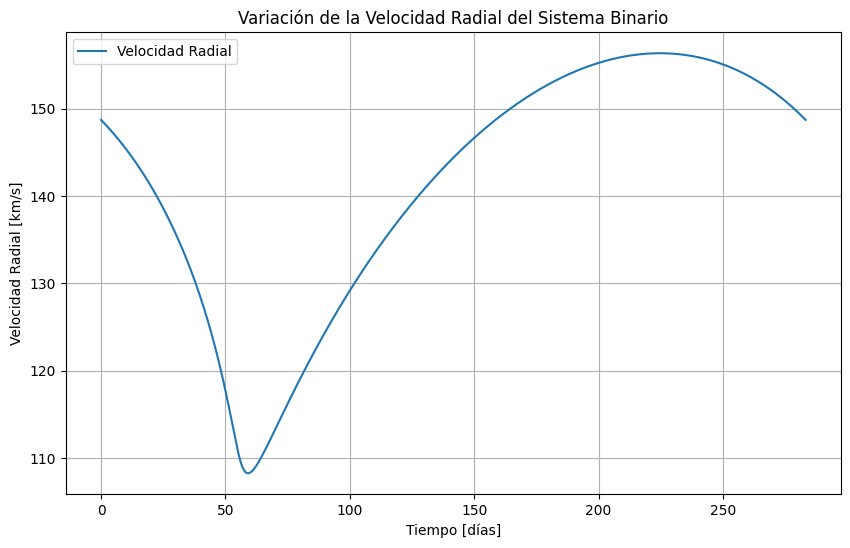

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de los parámetros
P = 283.21056894  # período orbital en días
e = 0.81530624  # excentricidad
omega = -2.809031  # longitud del pericentro en radianes
M0 = -1.24492828  # fase del pericentro en radianes
K = 24.05330568  # semi-amplitud de la velocidad radial en km/s
v0 = 150.84723023  # velocidad del baricentro en km/s

# Convertir el período a segundos
P_sec = P * 24 * 3600  # período en segundos

# Tiempo de simulación
t = np.linspace(0, P, 1000)  # tiempo en días
t_sec = t * 24 * 3600  # tiempo en segundos

# Función para calcular la anomalía excéntrica E
def solve_kepler(M, e, tol=1e-10):
    E = M  # inicializar E con el valor de M
    while True:
        E_next = E + (M + e * np.sin(E) - E) / (1 - e * np.cos(E))
        if np.abs(E_next - E) < tol:
            break
        E = E_next
    return E

# Calcular la anomalía excéntrica para cada tiempo t
M = 2 * np.pi * t / P + M0  # anomalía media
E = np.array([solve_kepler(Mi, e) for Mi in M])  # anomalía excéntrica

# Calcular la velocidad radial
v_radial = v0 + K * (np.cos(E - omega) + e * np.cos(omega))

# Graficar la velocidad radial
plt.figure(figsize=(10, 6))
plt.plot(t, v_radial, label='Velocidad Radial')
plt.xlabel('Tiempo [días]')
plt.ylabel('Velocidad Radial [km/s]')
plt.title('Variación de la Velocidad Radial del Sistema Binario')
plt.legend()
plt.grid(True)
plt.show()
